In [ ]:
import pandas as pd

# Load the training dataset
train_path = "train.tsv"

# Define column names based on LIAR dataset documentation
column_names = [
    "id","label", "statement", "subject", "speaker", "job_title", "state",
    "party", "barely_true_counts", "false_counts", "half_true_counts",
    "mostly_true_counts", "pants_on_fire_counts", "context"
]

# Load the dataset
train_df = pd.read_csv(train_path, sep='\t', names=column_names, header=None)

# Display basic information and first few rows
train_df.info(), train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10240 non-null  object 
 1   label                 10240 non-null  object 
 2   statement             10240 non-null  object 
 3   subject               10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   job_title             7342 non-null   object 
 6   state                 8030 non-null   object 
 7   party                 10238 non-null  object 
 8   barely_true_counts    10238 non-null  float64
 9   false_counts          10238 non-null  float64
 10  half_true_counts      10238 non-null  float64
 11  mostly_true_counts    10238 non-null  float64
 12  pants_on_fire_counts  10238 non-null  float64
 13  context               10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


(None,
            id        label                                          statement  \
 0   2635.json        false  Says the Annies List political group supports ...   
 1  10540.json    half-true  When did the decline of coal start? It started...   
 2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
 3   1123.json        false  Health care reform legislation is likely to ma...   
 4   9028.json    half-true  The economic turnaround started at the end of ...   
 
                               subject         speaker             job_title  \
 0                            abortion    dwayne-bohac  State representative   
 1  energy,history,job-accomplishments  scott-surovell        State delegate   
 2                      foreign-policy    barack-obama             President   
 3                         health-care    blog-posting                   NaN   
 4                        economy,jobs   charlie-crist                   NaN   
 
       state     

In [ ]:
train_df.head(10)

,id,label,statement,subject,speaker,job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


# **CHeck for Null Values**

In [ ]:
# Check for missing values
missing_values = train_df.isnull().sum()

missing_values

,0
id,0
label,0
statement,0
subject,2
speaker,2
job_title,2898
state,2210
party,2
barely_true_counts,2
false_counts,2


# **Handling missing values**

In [ ]:
# Drop 'job_title' column (too many missing values)
train_df.drop(columns=["job_title"], inplace=True)

# Drop rows where 'speaker' or 'subject' is missing
train_df.dropna(subset=["speaker", "subject"], inplace=True)

# Fill missing 'party' with "Independent"
train_df["party"].fillna("Independent", inplace=True)

# Fill missing 'state' and 'context' with "Unknown"
train_df["state"].fillna("Unknown", inplace=True)
train_df["context"].fillna("Unknown", inplace=True)

# Fill missing fact-check counts with 0
fact_check_cols = ["barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts"]
train_df[fact_check_cols] = train_df[fact_check_cols].fillna(0)

train_df.isnull().sum()


<ipython-input-3-3a0ca4704ab0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["party"].fillna("Independent", inplace=True)
<ipython-input-3-3a0ca4704ab0>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
id,0
label,0
statement,0
subject,0
speaker,0
state,0
party,0
barely_true_counts,0
false_counts,0
half_true_counts,0


# Categorizing columns to string types

In [ ]:
# Convert text-based columns to string type explicitly
text_columns = ["label", "statement", "subject", "speaker", "state", "party", "context", "context_category"]
train_df[text_columns] = train_df[text_columns].astype(str)

# Verify column data types
print(train_df.dtypes)


id                       object
label                    object
statement                object
subject                  object
speaker                  object
state                    object
party                    object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
context_category         object
word_count                int64
dtype: object


# Categorizing Context

In [ ]:
import re

# Define categories and their associated keywords (including article)
context_categories = {
    "interview": ["interview", "interviews"],
    "debate": ["debate"],
    "social media post": ["tweet", "twitter", "facebook post", "facebook", "instagram", "social media"],
    "statement": ["speech", "remarks", "address", "statement", "talk show","townhall", "town hall","committee meeting",
                  "hearing", "conference", "discussion", "comments", "forum"],
    "campaign": ["tv ad", "tv commercial", "campaign ad", "campaign tv ad","web ad", "commercial","advertisement", "ad", "campaign"],
    "news media": ["article", "news article", "op-ed", "editorial", "oped", "opinion-piece", "opinion piece", "news", "news release",
                "press release", "newspaper", "headline","opinion column", "reporters", "column", "reporter", "press", "newsletter"],
    "email": ["email", "e-mail"],
    "unknown": ["unknown"]
}

# Function to assign categories
def categorize_context(context_text):
    context_text = str(context_text).lower().strip()  # Normalize text
    for category, keywords in context_categories.items():
        if any(re.search(rf"\b{kw}\b", context_text) for kw in keywords):
            return category
    return "Other"  # Default category for unmatched values

# Apply function to categorize the context column
train_df["context_category"] = train_df["context"].apply(categorize_context)

In [ ]:
category_counts = train_df['context_category'].value_counts()
print(category_counts)

context_category
statement            2390
interview            1753
Other                1652
campaign             1439
news media           1390
debate                765
social media post     479
email                 270
unknown               100
Name: count, dtype: int64


In [ ]:
interview_df = train_df[train_df['context_category'] == 'Other']
interview_df.tail()

,id,label,statement,subject,speaker,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,context_category
10196,4387.json,mostly-true,Rail doesnt do a great job in lessening traffic.,transportation,chip-rogers,Georgia,republican,1.0,0.0,1.0,1.0,0.0,a meeting,Other
10206,7652.json,pants-fire,Gov. Scott Walker (is) more than halfway to (h...,jobs,maciver-institute,Wisconsin,independent,1.0,0.0,0.0,1.0,1.0,a web posting,Other
10215,9365.json,barely-true,"The Obama administration spent $205,075 in sti...","economy,stimulus",ted-cruz,Texas,republican,36.0,33.0,15.0,19.0,8.0,a report,Other
10218,1674.json,false,This race will be the Democrats top target thi...,"elections,states",debra-lehrmann,Unknown,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Other
10233,4388.json,pants-fire,Mayor Fung wants to punish our childrens educa...,"children,city-budget,deficit,education,state-b...",richard-tomlins,Rhode Island,democrat,0.0,0.0,0.0,0.0,1.0,a recorded telephone message to Cranston resid...,Other


In [ ]:
# Count unique values
unique_speakers = train_df["subject"].nunique()
unique_parties = train_df["party"].nunique()
unique_contexts = train_df["context"].nunique()

unique_speakers, unique_parties, unique_contexts

(3827, 23, 4346)

# Distribution of Fact-Check Labels

<ipython-input-51-dc209fdb6a40>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_df, x="label", order=train_df["label"].value_counts().index, palette="coolwarm")


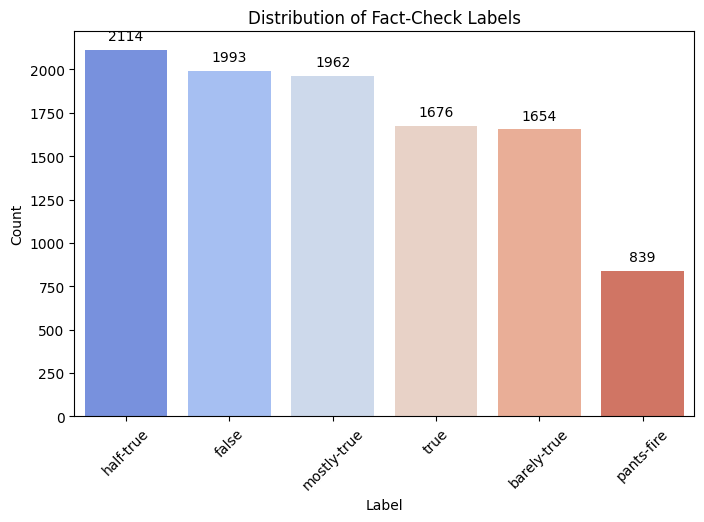

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train_df, x="label", order=train_df["label"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Fact-Check Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
# Add label counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


# Political Party Vs Misinformation Trends

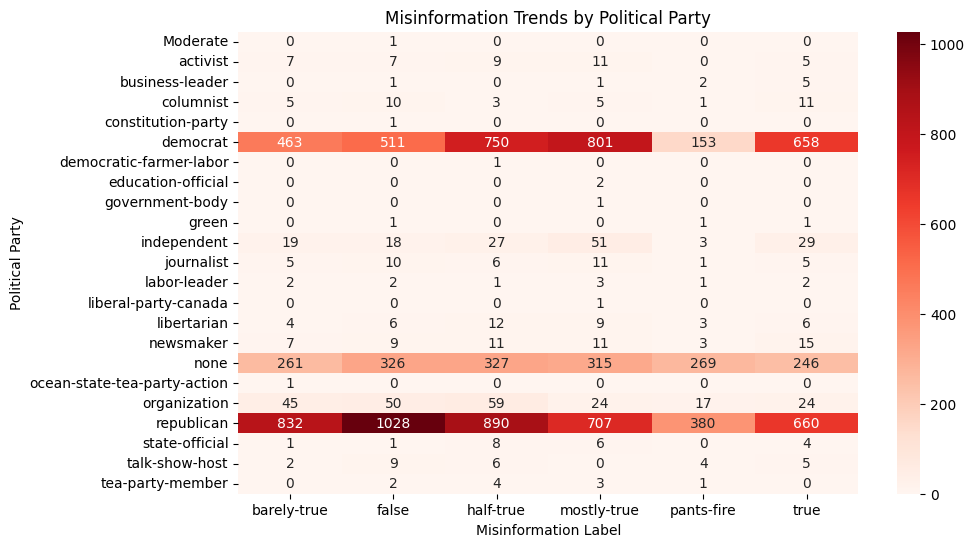

In [ ]:
party_misinfo = train_df.groupby(["party", "label"]).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(party_misinfo, annot=True, cmap="Reds", fmt=".0f")
plt.title("Misinformation Trends by Political Party")
plt.xlabel("Misinformation Label")
plt.ylabel("Political Party")
plt.show()


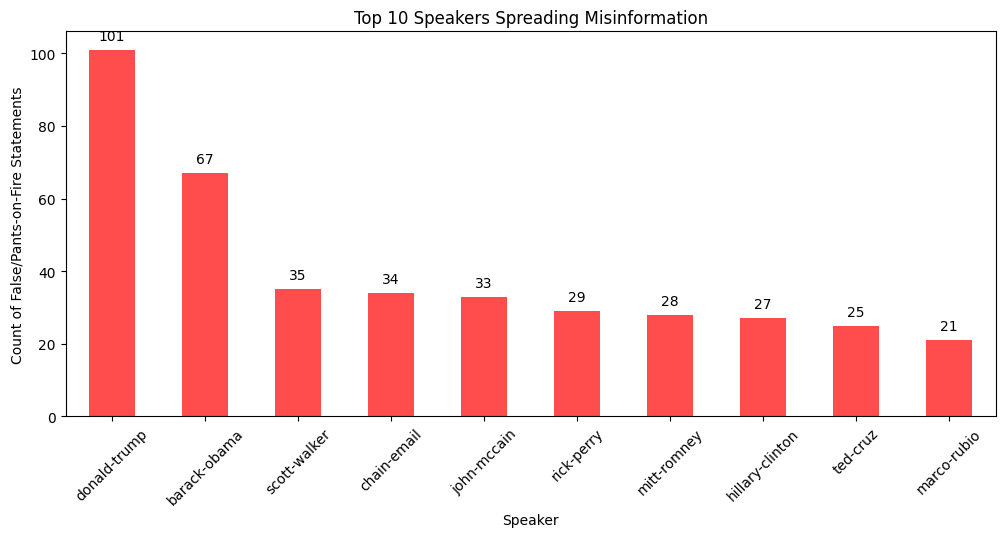

In [ ]:
top_misinformation_speakers = train_df[train_df["label"].isin(["false", "pants-on-fire"])].groupby("speaker").size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
ax = top_misinformation_speakers.plot(kind="bar", color="red", alpha=0.7)
plt.title("Top 10 Speakers Spreading Misinformation")
plt.xlabel("Speaker")
plt.ylabel("Count of False/Pants-on-Fire Statements")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


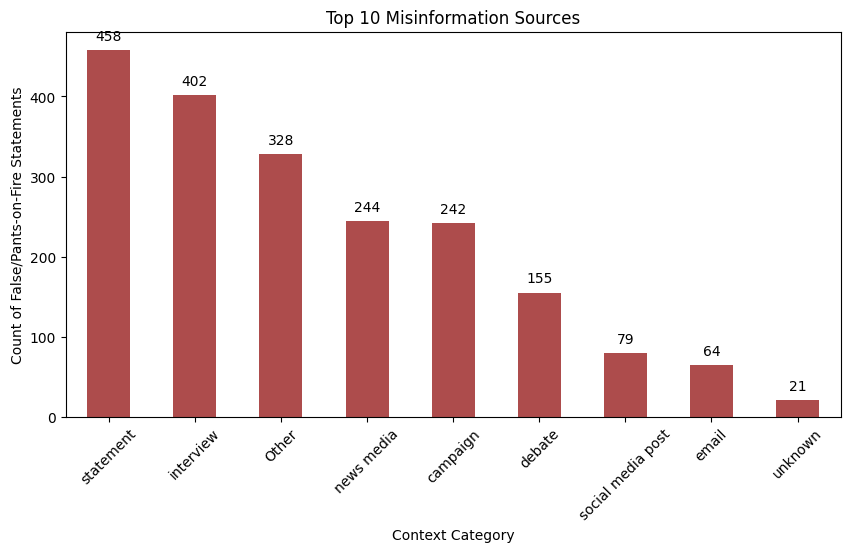

In [ ]:
top_misinfo_sources = train_df[train_df["label"].isin(["false", "pants-on-fire"])]["context_category"].value_counts().head(10)

plt.figure(figsize=(10, 5))
ax = top_misinfo_sources.plot(kind="bar", color="darkred", alpha=0.7)
plt.title("Top 10 Misinformation Sources")
plt.xlabel("Context Category")
plt.ylabel("Count of False/Pants-on-Fire Statements")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10238 entries, 0 to 10239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10238 non-null  object 
 1   label                 10238 non-null  object 
 2   statement             10238 non-null  object 
 3   subject               10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   state                 10238 non-null  object 
 6   party                 10238 non-null  object 
 7   barely_true_counts    10238 non-null  float64
 8   false_counts          10238 non-null  float64
 9   half_true_counts      10238 non-null  float64
 10  mostly_true_counts    10238 non-null  float64
 11  pants_on_fire_counts  10238 non-null  float64
 12  context               10238 non-null  object 
 13  context_category      10238 non-null  object 
 14  word_count            10238 non-null  int64  
dtypes: float64(5), int64(1),

In [ ]:
# Check if all values in a column are strings
print(train_df["statement"].apply(lambda x: isinstance(x, str)).all())  # Should return True if all are strings

# Check unique data types in object columns
print(train_df.select_dtypes(include=['object']).applymap(type).nunique())


True
id                  1
label               1
statement           1
subject             1
speaker             1
state               1
party               1
context             1
context_category    1
dtype: int64


<ipython-input-63-9fc8322bcccf>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(train_df.select_dtypes(include=['object']).applymap(type).nunique())


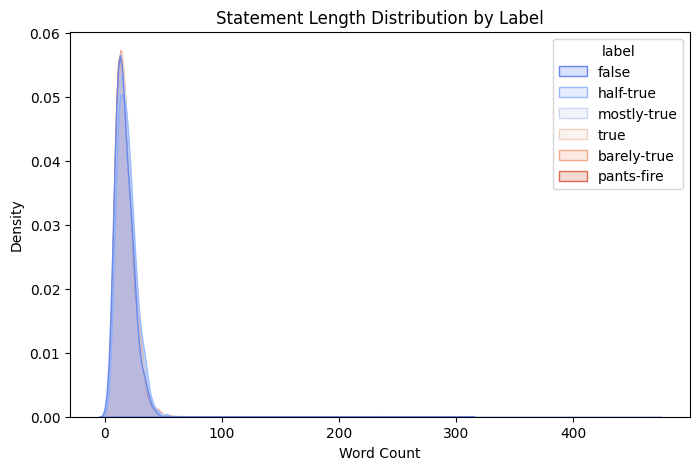

In [ ]:
train_df["word_count"] = train_df["statement"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_df, x="word_count", hue="label", fill=True, common_norm=False, palette="coolwarm")
plt.title("Statement Length Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()


<ipython-input-67-7516aa733d25>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=labels, title="label", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


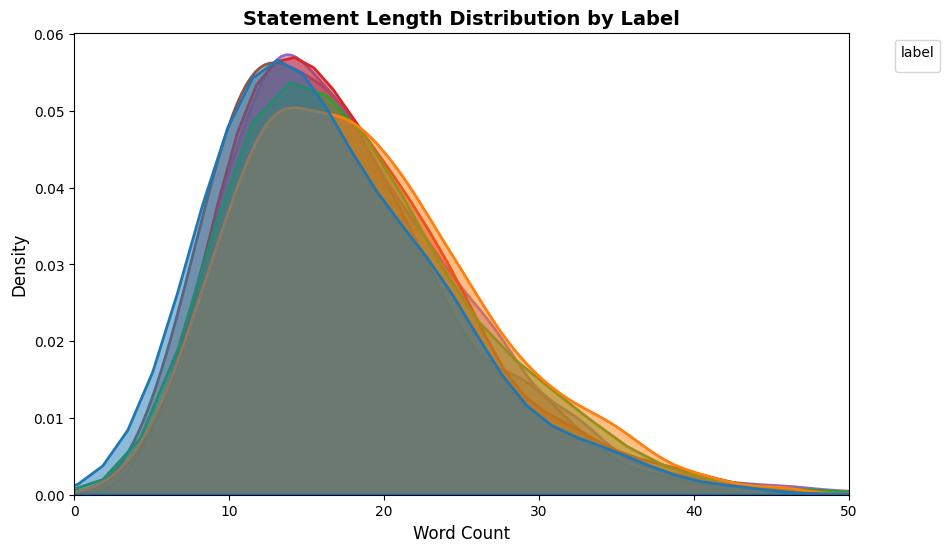

In [ ]:
# Convert 'statement' column to string before computing word count
train_df["statement"] = train_df["statement"].astype(str)

# Compute word count safely
train_df["word_count"] = train_df["statement"].apply(lambda x: len(x.split()))

# Ensure word_count is numeric
train_df["word_count"] = pd.to_numeric(train_df["word_count"], errors="coerce")

# Drop any rows with NaN word counts (just in case)
train_df.dropna(subset=["word_count"], inplace=True)

# Improved KDE plot for better readability with distinct colors and visible labels
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x="word_count", hue="label", fill=True, common_norm=False,
            palette="tab10", alpha=0.5, linewidth=2)

# Set x-axis limit to remove extreme outliers
plt.xlim(0, 50)  # Adjusted to focus on most frequent word counts

# Add title and labels with better readability
plt.title("Statement Length Distribution by Label", fontsize=14, fontweight='bold')
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Ensure legend is properly displayed
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="label", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the updated plot
plt.show()


In [ ]:
# Import necessary libraries
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Limit dataset for faster processing (if needed)
sample_df = train_df.sample(n=5000, random_state=42)  # Adjust sample size as needed

# Add nodes and edges for speakers and statements
for _, row in sample_df.iterrows():
    speaker, statement, label = row["speaker"], row["statement"], row["label"]

    # Add speaker as a node
    G.add_node(speaker, type="speaker")

    # Add statement as a node (to connect with the speaker)
    G.add_node(statement, type="statement", label=label)

    # Add edge between speaker and statement
    G.add_edge(speaker, statement, label=label)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)

# Identify top 10 misinformation spreaders based on degree centrality
misinfo_speakers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame for display
import pandas as pd
misinfo_speakers_df = pd.DataFrame(misinfo_speakers, columns=["Speaker", "Degree Centrality"])

# Display the top misinformation spreaders
misinfo_speakers_df


,Speaker,Degree Centrality
0,barack-obama,0.036169
1,donald-trump,0.019476
2,hillary-clinton,0.016547
3,mitt-romney,0.013326
4,scott-walker,0.011715
5,john-mccain,0.009811
6,marco-rubio,0.008932
7,rick-perry,0.008786
8,chain-email,0.008640
9,rick-scott,0.008200


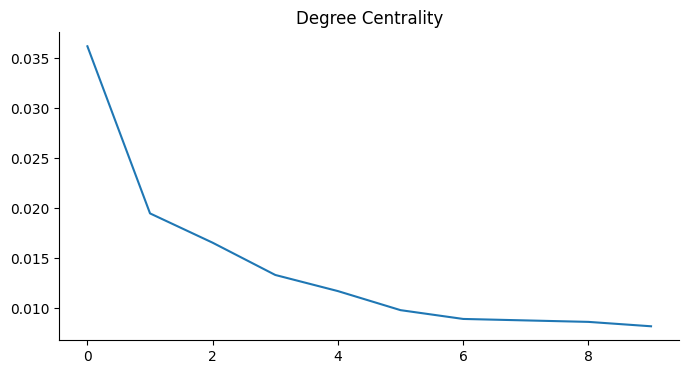

In [ ]:
# @title Degree Centrality

from matplotlib import pyplot as plt
misinfo_speakers_df['Degree Centrality'].plot(kind='line', figsize=(8, 4), title='Degree Centrality')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Compute betweenness centrality for the graph
betweenness_centrality = nx.betweenness_centrality(G)

# Identify top 10 misinformation spreaders based on betweenness centrality
misinfo_speakers_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame for display
misinfo_speakers_betweenness_df = pd.DataFrame(misinfo_speakers_betweenness, columns=["Speaker", "Betweenness Centrality"])

# Display the top misinformation spreaders based on betweenness centrality
misinfo_speakers_betweenness_df


,Speaker,Betweenness Centrality
0,barack-obama,0.001303
1,donald-trump,0.000377
2,hillary-clinton,0.000271
3,john-mccain,0.000208
4,mitt-romney,0.000176
5,newt-gingrich,0.000146
6,scott-walker,0.000136
7,On torture.,0.000115
8,marco-rubio,0.000078
9,rick-perry,0.000076


Number of nodes: 13156
Number of edges: 13144
Graph density: 0.00015189477288530385


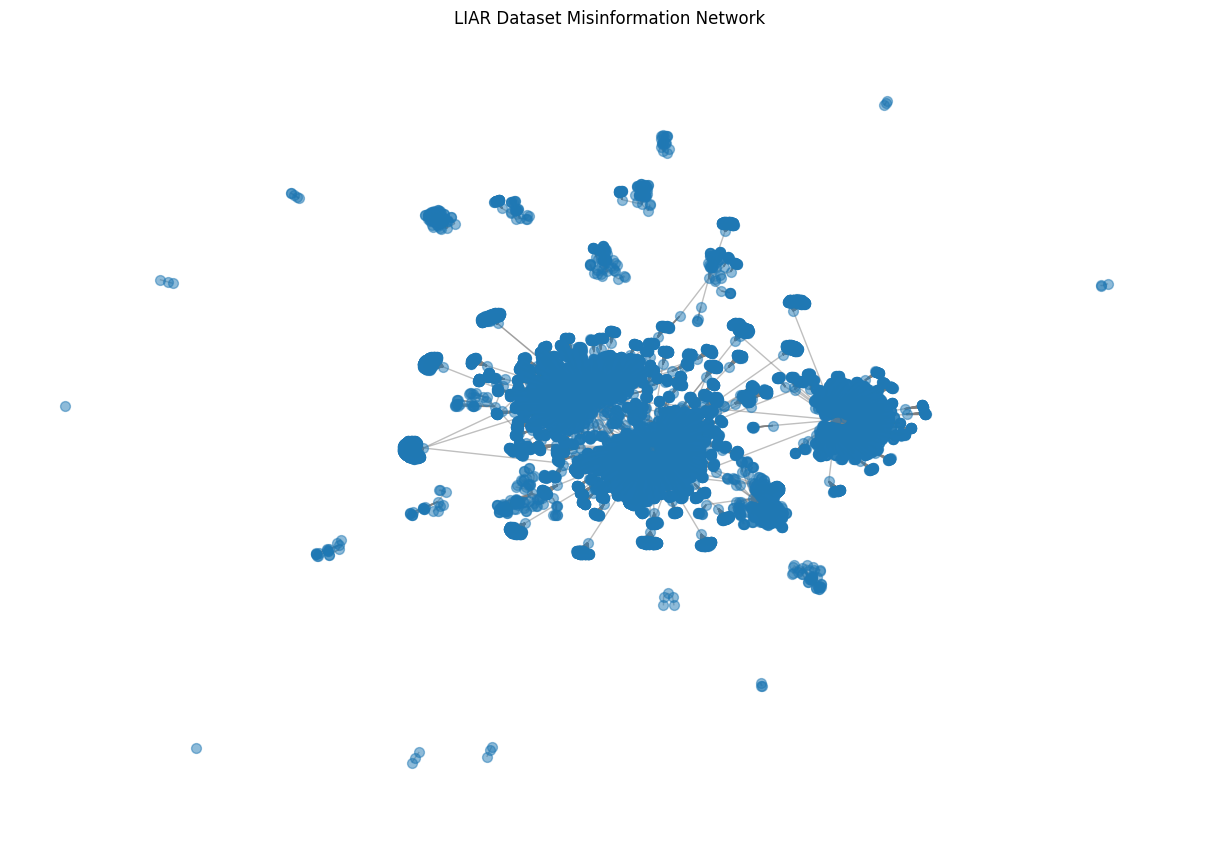

[('republican', 0.06681870011402509),
 ('none', 0.06514633219308248),
 ('democrat', 0.06142151273280121),
 ('barack-obama', 0.037172177879133406),
 ('donald-trump', 0.020828582288103383),
 ('hillary-clinton', 0.018244013683010263),
 ('mitt-romney', 0.013454960091220068),
 ('organization', 0.011478525275560623),
 ('scott-walker', 0.011326491828202204),
 ('john-mccain', 0.011250475104522996)]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.Graph()

# Add nodes and edges
for _, row in train_df.iterrows():
    speaker = row["speaker"]
    party = row["party"]
    statement = row["statement"]
    label = row["label"]  # Misinformation level (true, false, pants-fire, etc.)

    # Add speaker and party as nodes
    if pd.notna(speaker):
        G.add_node(speaker, type="person")

    if pd.notna(party):
        G.add_node(party, type="political_party")

    # Add fact-checked statement as a node
    if pd.notna(statement):
        G.add_node(statement, type="statement", truth_label=label)

    # Connect speaker to their political party
    if pd.notna(speaker) and pd.notna(party):
        G.add_edge(speaker, party)

    # Connect speaker to the statements they made
    if pd.notna(speaker) and pd.notna(statement):
        G.add_edge(speaker, statement, label=label)

# Print graph summary
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph density: {nx.density(G)}")  # Example of another graph property

# Compute degree centrality (number of connections per node)
degree_centrality = nx.degree_centrality(G)

# Find top 10 most connected nodes (potential misinformation spreaders)
top_spreaders = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Visualize the network graph
plt.figure(figsize=(12, 8))
nx.draw(G, node_size=50, edge_color="gray", alpha=0.5)
plt.title("LIAR Dataset Misinformation Network")
plt.show()

# Display graph info and top spreaders
top_spreaders


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print(f"Number of communities detected: {len(communities)}")


Number of communities detected: 439


In [ ]:
for person in ["barack-obama", "donald-trump", "hillary-clinton"]:
    print(f"\nStatements by {person}:")
    print(train_df[train_df["speaker"] == person][["statement", "label"]].head(5))



Statements by barack-obama:
                                             statement        label
2    Hillary Clinton agrees with John McCain "by vo...  mostly-true
7    I'm the only person on this stage who has work...    half-true
16   McCain opposed a requirement that the governme...         true
74   The cost of health care is now the single-bigg...  mostly-true
105  Sen. Obama has always had a 100 percent procho...         true

Statements by donald-trump:
                                             statement        label
57   They were going to build the wall a while ago,...  barely-true
67   Says the man who rushed the stage at him in Da...        false
104  NATO is opening up a major terror division. .....        false
149  On the VA: Over 300,000 veterans have died wai...  barely-true
247  Says Hillary Clinton said the Veterans Affairs...  barely-true

Statements by hillary-clinton:
                                             statement        label
22   We just had the best 

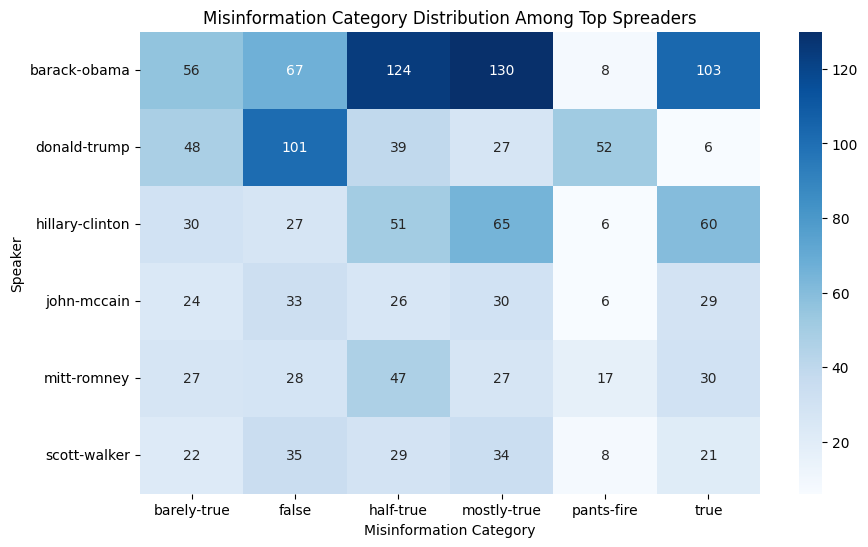

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count misinformation categories for each top spreader
top_speakers = ["barack-obama", "donald-trump", "hillary-clinton", "mitt-romney", "scott-walker", "john-mccain"]
filtered_df = train_df[train_df["speaker"].isin(top_speakers)]

# Count occurrences of misinformation labels for each speaker
misinfo_distribution = filtered_df.groupby(["speaker", "label"]).size().unstack().fillna(0)

# Plot heatmap for misinformation category distribution
plt.figure(figsize=(10, 6))
sns.heatmap(misinfo_distribution, annot=True, cmap="Blues", fmt=".0f")
plt.title("Misinformation Category Distribution Among Top Spreaders")
plt.xlabel("Misinformation Category")
plt.ylabel("Speaker")
plt.show()


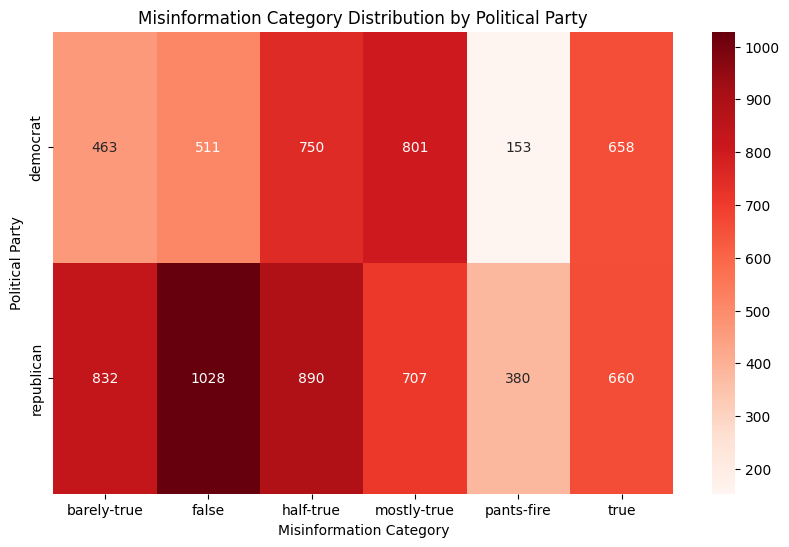

In [ ]:
# Compare misinformation patterns across political parties

# Filter dataset to include only Republican and Democrat speakers
party_df = train_df[train_df["party"].isin(["republican", "democrat"])]

# Count occurrences of misinformation labels for each party
party_misinfo_distribution = party_df.groupby(["party", "label"]).size().unstack().fillna(0)

# Plot heatmap for misinformation category distribution across parties
plt.figure(figsize=(10, 6))
sns.heatmap(party_misinfo_distribution, annot=True, cmap="Reds", fmt=".0f")
plt.title("Misinformation Category Distribution by Political Party")
plt.xlabel("Misinformation Category")
plt.ylabel("Political Party")
plt.show()


In [ ]:
# Reload the dataset without altering the 'context' column
train_df_1 = pd.read_csv("train.tsv", sep='\t', names=column_names, header=None, dtype={"context": "str"})

# Retrieve the first 20 unique values from the 'context' column
unique_context_values = train_df_1["context"].dropna().unique()

# Display unique values of the context column
unique_context_values


array(['a mailer', 'a floor speech.', 'Denver', ...,
       'a recorded telephone message to Cranston residents',
       'interview on "The Colbert Report"',
       "a televised debate on Miami's WPLG-10 against Kendrick Meek."],
      dtype=object)